In [4]:
import sys
  
# append the path of the
# parent directory
sys.path.append("..")


import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import json, csv
import mne
import scipy
import pandas
import mbt_pyspt as mbt
from mbt_pyspt.models.eegdata import EEGData
from mbt_pyspt.modules.preprocessingflow import PreprocessingFlow
from utils.em_data_loader import generate_em_mne_events
from utils.em_data_loader import add_em_events_melo_raw
from utils.em_data_loader import parse_playlist
from utils.em_data_loader import generate_participants_events
from utils.em_data_loader import generate_participants_datasets
from utils.em_data_loader import split_dataset_p1
from utils.em_data_loader import split_dataset_p2
from scipy.fft import fft, fftfreq
from pprint import pprint

print("All libraries successfully loaded!")

All libraries successfully loaded!


In [2]:
path_eo_ec = '../data/em_ca_experiment_slim/1EOEC'
path_ec_eo = '../data/em_ca_experiment_slim/2ECEO'
excluded = ['s050702', 's020702', 's060702', 's250603', 's220603', 's220604' 's170603', 's050703', 's050705']
eo_ec_folders = []
ec_eo_folders = []
eeg_folder = 'eeg_raw'
metadata_folder = 'metadata'
physio_folder = 'physio_raw'

for directory in os.listdir(path_eo_ec):
    if directory != 'excluded':
        eo_ec_folders.append(directory)
for directory in os.listdir(path_ec_eo):
    if directory != 'excluded':
        ec_eo_folders.append(directory)


generate_participants_datasets(path_eo_ec, eo_ec_folders, '1EOEC')
generate_participants_datasets(path_ec_eo, ec_eo_folders, '2ECEO')

print("All datasets loaded")
        
    


Processing participant s010701
s010701 ...loaded!
s010701 ...generated events!
s010701 ...split data part 1!
s010701 ...split data part 2!
s010701...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s010701/s010701_prepared.json !
Processing participant s010704
s010704 ...loaded!
s010704 ...generated events!
s010704 ...split data part 1!
s010704 ...split data part 2!
s010704...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s010704/s010704_prepared.json !
Processing participant s020701
s020701 ...loaded!
s020701 ...generated events!
s020701 ...split data part 1!
s020701 ...split data part 2!
s020701...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s020701/s020701_prepared.json !
Processing participant s020704
s020704 ...loaded!
s020704 ...generated events!
s020704 ...split data part 1!
s020704 ...split data part 2!
s020704...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s020704/s020704_prepared.json !


s290603 ...loaded!
s290603 ...generated events!
s290603 ...split data part 1!
s290603 ...split data part 2!
s290603...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s290603/s290603_prepared.json !
Processing participant s290605
s290605 ...loaded!
s290605 ...generated events!
s290605 ...split data part 1!
s290605 ...split data part 2!
s290605...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s290605/s290605_prepared.json !
Processing participant s300604
s300604 ...loaded!
s300604 ...generated events!
s300604 ...split data part 1!
s300604 ...split data part 2!
s300604...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s300604/s300604_prepared.json !
All datasets loaded


In [6]:
print(participants_eo_ec.keys())
print(participants_ec_eo.keys())

dict_keys(['s010701', 's010704', 's020701', 's020704', 's050701', 's070701', 's170601', 's210602', 's230604', 's240601', 's240602', 's240604', 's250601', 's260602', 's280603', 's280604', 's290602', 's290604', 's300602'])
dict_keys(['s010702', 's010703', 's020703', 's050704', 's060703', 's070702', 's220602', 's230602', 's230603', 's250602', 's250604', 's260601', 's280601', 's290601', 's290603', 's290605', 's300604'])


In [2]:

# Opening JSON file
file_part_one = open("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json")
file_part_two = open("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json")
file_metadata = open("../data/em_ca_experiment_slim/1EOEC/s020701/metadata/s020701_experiment_eo_ec_2021_Jul_02_0950.json")
bvp = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/BVP.csv')
eda = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/EDA.csv')
hr = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/HR.csv')
temp = np.genfromtxt('../data/em_ca_experiment_slim/1EOEC/s020701/physio_raw/TEMP.csv')

condition = '1EOEC'                     
# returns JSON object as 
# a dictionary
data_p1 = json.load(file_part_one)
data_p2 = json.load(file_part_two)
metadata = json.load(file_metadata)

playlist_p1_raw = metadata['playlist_p1']['val']
playlist_p2_raw = metadata['playlist_p2']['val']
playlist_p1 = parse_playlist(playlist_p1_raw, condition)
playlist_p2 = parse_playlist(playlist_p2_raw, condition)
    
print(playlist_p1, playlist_p2)

['EO/class_3_A', 'EC/class_3_B', 'EO/class_1_A', 'EC/class_1_B', 'EO/class_4_A', 'EC/class_4_B', 'EO/class_2_A', 'EC/class_2_B'] ['EO/class_4_B', 'EC/class_4_A', 'EO/class_2_B', 'EC/class_2_A', 'EO/class_1_B', 'EC/class_1_A', 'EO/class_3_B', 'EC/class_3_A']


In [3]:
events_p1 = generate_em_mne_events("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json", playlist_p1, part_one=True, part_two=False)
events_p2 = generate_em_mne_events("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json", playlist_p2, part_one=False, part_two=True)

add_em_events_melo_raw("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json", events_p1)
add_em_events_melo_raw("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json", events_p2)



Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p1/2021-07-02_10-09-41.367-Acquisier-melo_1010400041.json
Successfully saved events into  ../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/p2/2021-07-02_10-29-04.872-Acquisier-melo_1010400041.json


In [4]:
events = [x[0] for x in events_p1]
events_id = [x[2] for x in events_p1]
data_cut_p1 = split_dataset_p1(data_p1, metadata, events, events_id, samp_rate=250)
pprint(data_cut_p1.keys())

events = [x[0] for x in events_p2]
events_id = [x[2] for x in events_p2]
data_cut_p2 = split_dataset_p1(data_p2, metadata, events, events_id, samp_rate=250)
pprint(data_cut_p2.keys())

data_cut = data_cut_p1
data_cut.update(data_cut_p2)

out_file = open("../data/em_ca_experiment_slim/1EOEC/s020701/eeg_raw/s020701_cut.json", "w")
  
json.dump(data_cut, out_file, indent = 4)
  
out_file.close()  

dict_keys(['resting_EO', 'resting_EC', 'white_noise_1a', 'EO/class_3_A', 'white_noise_1b', 'EC/class_3_B', 'white_noise_2a', 'EO/class_1_A', 'white_noise_2b', 'EC/class_1_B', 'white_noise_3a', 'EO/class_4_A', 'white_noise_3b', 'EC/class_4_B', 'white_noise_4a', 'EO/class_2_A', 'white_noise_4b', 'EC/class_2_B'])
dict_keys(['white_noise', 'EO/class_4_B', 'white_noise_1a', 'EC/class_4_A', 'white_noise_1b', 'EO/class_2_B', 'white_noise_2a', 'EC/class_2_A', 'white_noise_2b', 'EO/class_1_B', 'white_noise_3a', 'EC/class_1_A', 'white_noise_3b', 'EO/class_3_B', 'white_noise_4a', 'EC/class_3_A', 'resting_EO_4b', 'resting_EC'])


In [6]:
annotation_csv = pandas.read_csv('../data/em_ca_experiment_slim/1EOEC/s240604/metadata/s240604_experiment_eo_ec_2021_Jun_24_1615.csv', encoding='utf-8')

# To extract the annotations we need to get the array using Pandas to open the .csv file, 
# however Pandas will return a string containing the array. To work around this issue the
# following code is used:
# annotation_csv['mouse.x'][0][1:-1].split(',') 
# We have the 1:-1 here because we want to get rid of the square brackets that are in the string.
# We then convert all the values to float using list comprehension:
# [float(x) for x in annotation_csv['mouse.x'][0][1:-1].split(',')]

annotations = {
    "trial_1a": {
        "x": [float(x) for x in annotation_csv['mouse.x'][0][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse.y'][0][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating.response"][0],
        "familiarity": annotation_csv["song_one_rating.response"][1]
    },
    "trial_1b": {
        "x": [float(x) for x in annotation_csv['mouse_2.x'][2][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_2.y'][2][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating.response"][2],
        "familiarity": annotation_csv["song_two_rating.response"][3]
    },
    "trial_2a": {
        "x": [float(x) for x in annotation_csv['mouse.x'][5][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse.y'][5][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating.response"][5],
        "familiarity": annotation_csv["song_one_rating.response"][6]
    },
    "trial_2b": {
        "x": [float(x) for x in annotation_csv['mouse_2.x'][7][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_2.y'][7][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating.response"][7],
        "familiarity": annotation_csv["song_two_rating.response"][8]
    },
    "trial_3a": {
        "x": [float(x) for x in annotation_csv['mouse.x'][10][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse.y'][10][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating.response"][10],
        "familiarity": annotation_csv["song_one_rating.response"][11]
    },
    "trial_3b": {
        "x": [float(x) for x in annotation_csv['mouse_2.x'][12][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_2.y'][12][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating.response"][12],
        "familiarity": annotation_csv["song_two_rating.response"][13]
    },
    "trial_4a": {
        "x": [float(x) for x in annotation_csv['mouse.x'][15][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse.y'][15][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating.response"][15],
        "familiarity": annotation_csv["song_one_rating.response"][16]
    },
    "trial_4b": {
        "x": [float(x) for x in annotation_csv['mouse_2.x'][17][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_2.y'][17][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating.response"][17],
        "familiarity": annotation_csv["song_two_rating.response"][18]
    },
    "trial_5a": {
        "x": [float(x) for x in annotation_csv['mouse_3.x'][20][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_3.y'][20][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating_2.response"][20],
        "familiarity": annotation_csv["song_one_rating_2.response"][21]
    },
    "trial_5b": {
        "x": [float(x) for x in annotation_csv['mouse_4.x'][22][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_4.y'][22][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating_2.response"][22],
        "familiarity": annotation_csv["song_two_rating_2.response"][23]
    },
    "trial_6a": {
        "x": [float(x) for x in annotation_csv['mouse_3.x'][25][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_3.y'][25][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating_2.response"][25],
        "familiarity": annotation_csv["song_one_rating_2.response"][26]
    },
    "trial_6b": {
        "x": [float(x) for x in annotation_csv['mouse_4.x'][27][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_4.y'][27][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating_2.response"][27],
        "familiarity": annotation_csv["song_two_rating_2.response"][28]
    },
    "trial_7a": {
        "x": [float(x) for x in annotation_csv['mouse_3.x'][30][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_3.y'][30][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating_2.response"][30],
        "familiarity": annotation_csv["song_one_rating_2.response"][31]
    },
    "trial_7b": {
        "x": [float(x) for x in annotation_csv['mouse_4.x'][32][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_4.y'][32][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating_2.response"][32],
        "familiarity": annotation_csv["song_two_rating_2.response"][33]
    },
    "trial_8a": {
        "x": [float(x) for x in annotation_csv['mouse_3.x'][35][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_3.y'][35][1:-1].split(',')],
        "liking": annotation_csv["song_one_rating_2.response"][35],
        "familiarity": annotation_csv["song_one_rating_2.response"][36]
    },
    "trial_8b": {
        "x": [float(x) for x in annotation_csv['mouse_4.x'][37][1:-1].split(',')],
        "y": [float(y) for y in annotation_csv['mouse_4.y'][37][1:-1].split(',')],
        "liking": annotation_csv["song_two_rating_2.response"][37],
        "familiarity": annotation_csv["song_two_rating_2.response"][38]
    }
}
# the json file where the output must be stored
#out_file = open("../data/em_ca_experiment_slim/1EOEC/s240604/metadata/s240604_annotations.json", "w")
  
#json.dump(annotations, out_file, indent = 4)
  
#out_file.close()    

for trial in annotations:
    print(trial)
    print("x:" + str(len(annotations[trial]["x"])/50))
    print("y:" + str(len(annotations[trial]["y"])/50))
    print("")


trial_1a
x:2967
y:2967

trial_1b
x:2960
y:2960

trial_2a
x:2945
y:2945

trial_2b
x:3003
y:3003

trial_3a
x:2959
y:2959

trial_3b
x:2931
y:2931

trial_4a
x:2969
y:2969

trial_4b
x:2962
y:2962

trial_5a
x:2959
y:2959

trial_5b
x:2990
y:2990

trial_6a
x:2989
y:2989

trial_6b
x:2995
y:2995

trial_7a
x:2929
y:2929

trial_7b
x:2938
y:2938

trial_8a
x:2982
y:2982

trial_8b
x:2967
y:2967



In [14]:

statusData = data_p2['recording']['statusData']
i = 0
t_idx = []
while i < len(statusData):
    if statusData[i] == 1.0:
        print("Second: " + str(i/250) + " - Index: " + str(i))
        t_idx.append(i)
        i += 250
    else:
        i += 1
        
#print(t_idx)

sr = 250 # Sampling Rate
# Cut the Resting State EO
enter_rest_state_eo = [[], []]
idx = t_idx[1]
enter_rest_state_eo[0] = data_p1['recording']['channelData'][0][idx : idx+(120*sr)]
enter_rest_state_eo[1] = data_p1['recording']['channelData'][1][idx : idx+(120*sr)]

# Cut the Resting State EC
enter_rest_state_ec = [[],[]]
idx = t_idx[2]
enter_rest_state_ec[0] = data_p1['recording']['channelData'][0][idx : idx+(120*sr)]
enter_rest_state_ec[1] = data_p1['recording']['channelData'][1][idx : idx+(120*sr)]

# Cut the Trial 1 white noises and stimuli
wn_t1_a = [[], []]
idx = t_idx[3]
wn_t1_a[0] = data_p1['recording']['channelData'][0][idx+(15*sr) : idx+(30*sr)] #the first trial has 15 extra seconds of WN that we do not need
wn_t1_a[1] = data_p1['recording']['channelData'][1][idx+(15*sr) : idx+(30*sr)]

t1_a = [[], []]
idx = t_idx[4]
t1_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t1_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t1_b = [[], []]
idx = t_idx[5]
wn_t1_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t1_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t1_b = [[], []]
idx = t_idx[6]
t1_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t1_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]


# Cut the Trial 2 white noises and stimuli
wn_t2_a = [[], []]
idx = t_idx[7]
wn_t2_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t2_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t2_a = [[], []]
idx = t_idx[8]
t2_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t2_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t2_b = [[], []]
idx = t_idx[9]
wn_t2_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t2_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t2_b = [[], []]
idx = t_idx[10]
t2_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t2_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]


# Cut the Trial 3 white noises and stimuli
wn_t3_a = [[], []]
idx = t_idx[11]
wn_t3_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t3_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t3_a = [[], []]
idx = t_idx[12]
t3_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t3_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t3_b = [[], []]
idx = t_idx[13]
wn_t3_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t3_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t3_b = [[], []]
idx = t_idx[14]
t3_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t3_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]



# Cut the Trial 4 white noises and stimuli
wn_t4_a = [[], []]
idx = t_idx[15]
wn_t4_a[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t4_a[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t4_a = [[], []]
idx = t_idx[16]
t4_a[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t4_a[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]

wn_t4_b = [[], []]
idx = t_idx[17]
wn_t4_b[0] = data_p1['recording']['channelData'][0][idx : idx+(15*sr)]
wn_t4_b[1] = data_p1['recording']['channelData'][1][idx : idx+(15*sr)]

t4_b = [[], []]
idx = t_idx[18]
t4_b[0] = data_p1['recording']['channelData'][0][idx : idx+(60*sr)]
t4_b[1] = data_p1['recording']['channelData'][1][idx : idx+(60*sr)]
#print(len(wn_t1_b[0]))



#add_events_to_meloRawJSON("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/test.json")

Second: 3.8 - Index: 950
Second: 23.8 - Index: 5950
Second: 104.4 - Index: 26100
Second: 119.36 - Index: 29840
Second: 199.6 - Index: 49900
Second: 214.6 - Index: 53650
Second: 295.08 - Index: 73770
Second: 310.08 - Index: 77520
Second: 390.32 - Index: 97580
Second: 405.04 - Index: 101260
Second: 485.52 - Index: 121380
Second: 500.48 - Index: 125120
Second: 580.68 - Index: 145170
Second: 595.32 - Index: 148830
Second: 675.88 - Index: 168970
Second: 690.92 - Index: 172730
Second: 771.12 - Index: 192780
Second: 811.96 - Index: 202990
Second: 947.16 - Index: 236790
Datasets loaded


266250
266250
1065 0.25


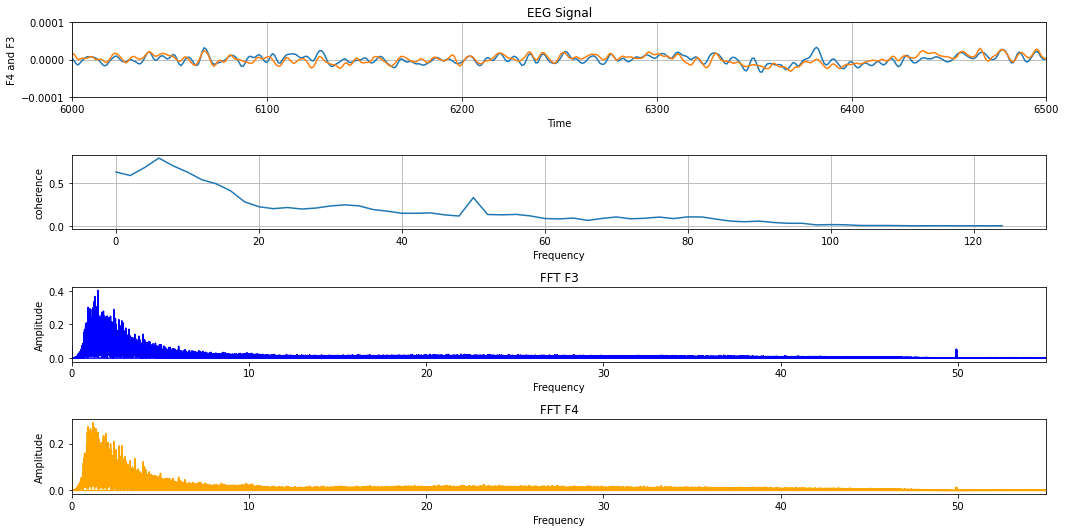

In [8]:
# Playing with Melomind data


with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p2/2021-07-01_10-24-49.069-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    print(len(dataset['recording']['channelData'][0])) # 250 samples per second
    print(len(dataset['recording']['statusData'])) # 250 samples per second
    print(len(dataset['recording']['qualities'][0]), dataset['recording']['qualities'][0][0]) # 1 sample per second
    
    triggers = dataset['recording']['statusData']
    
    dt = 0.004 # sampling interval
    Fs = 1/dt # sampling frequency of 250Hz
    duration = len(dataset['recording']['qualities'][0])
    t = np.arange(0, duration * 250)
    F4 = np.array(dataset['recording']['channelData'][0])
    F3 = np.array(dataset['recording']['channelData'][1]) 
    
    plt.rcParams["figure.figsize"] = [15, 7.50]
    fig, axs = plt.subplots(4, 1)
    axs[0].set_title("EEG Signal")
    axs[0].plot(t, F4, t, F3)
    axs[0].set_xlim(6000, 6500)
    axs[0].set_ylim(-0.0001, 0.0001)
    axs[0].set_xlabel("Time")
    axs[0].set_ylabel("F4 and F3")
    axs[0].grid(True)
    
    cxy, f = axs[1].cohere(F4, F3, 125, Fs)
    axs[1].set_ylabel('coherence')
    
    N = int(250  * duration)

    yfF4 = fft(F4)
    yfF3 = fft(F3)
    xf = fftfreq(N, 1/250)

    axs[2].plot(xf, np.abs(yfF3), color='blue')
    axs[2].set_xlim(0, 55)
    axs[2].set_ylabel('Amplitude')
    axs[2].set_xlabel('Frequency')
    axs[2].set_title('FFT F3')
    
    axs[3].plot(xf, np.abs(yfF4), color='orange' )
    axs[3].set_xlim(0, 55)
    axs[3].set_ylabel('Amplitude')
    axs[3].set_xlabel('Frequency')
    axs[3].set_title('FFT F4')
    
    fig.tight_layout()
    plt.show()

In [7]:
# Using MNE data format

with open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p1/2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json", 'r') as json_data:
    dataset = json.load(json_data)
    channel_data = dataset['recording']['channelData']
    sampling_rate = dataset['header']['sampRate']
    channel_locations = dataset['header']['acquisitionLocation']
    eeg_data = EEGData(channel_data, sampling_rate, channel_locations)
    print(eeg_data.mne_data.info)

Creating RawArray with float64 data, n_channels=2, n_times=269250
    Range : 0 ... 269249 =      0.000 ...  1076.996 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: F4, F3
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


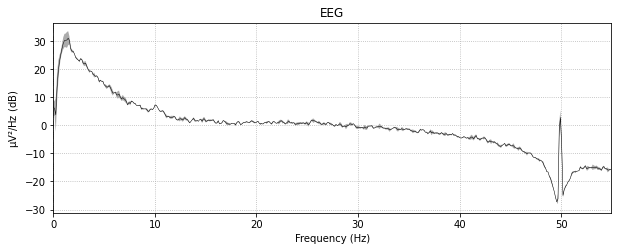

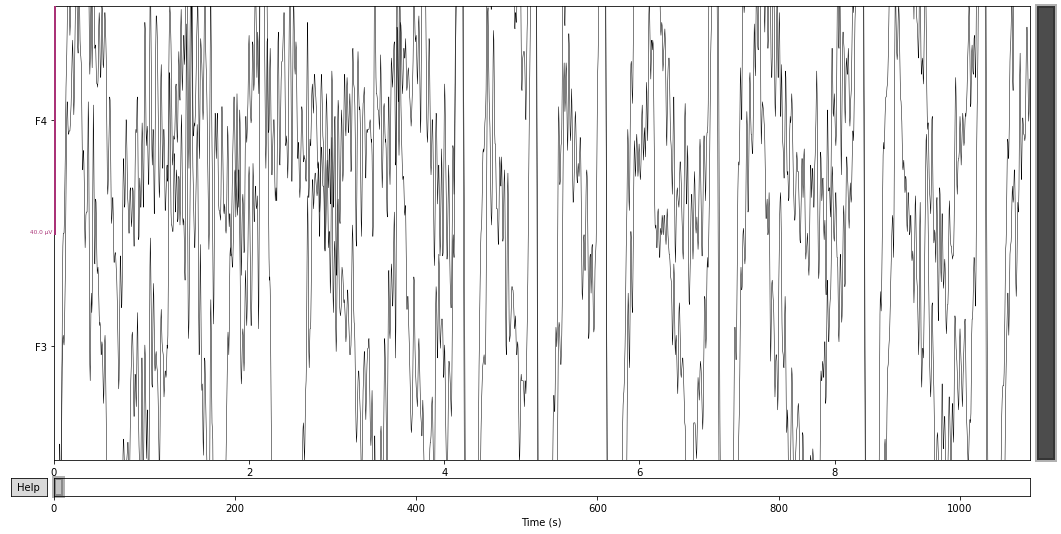

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


<ipython-input-8-186d85ae03d4>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, average=False)


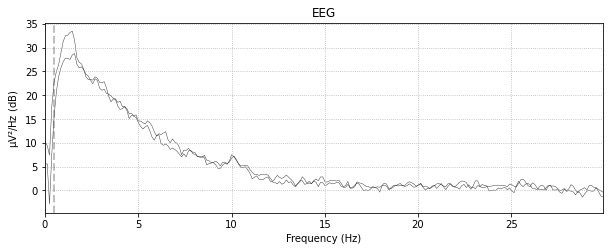

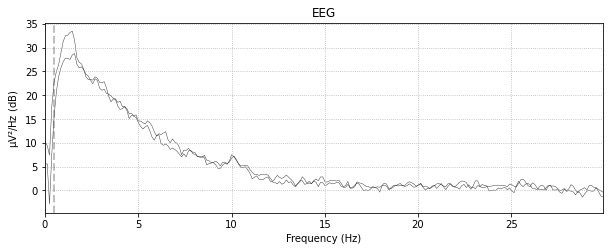

In [8]:
# Plotting with MNE data format

eeg_data.mne_data.plot_psd(fmax=55, average=True)
eeg_data.mne_data.plot(n_channels=2)
frontal_channels = channel_locations
freqs = (50, 100)
eeg_data.mne_data.notch_filter(freqs=freqs)
#eeg_data.mne_data.resample(sfreq=64)
eeg_data.mne_data.filter(l_freq=0.5, h_freq=30)
eeg_data.mne_data.plot_psd(fmax=30, picks=frontal_channels, average=False)

In [ ]:
eeg_data.mne_data.plot_psd_topo()

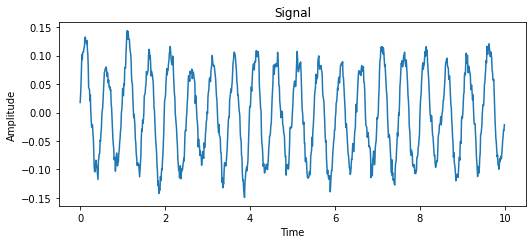

In [31]:
# Just a random signal plotting example

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

np.random.seed(0)

dt = 0.01 # sampling interval
Fs = 1 / dt # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(4 * np.pi * t) + cnse
fig, axs = plt.subplots()
axs.set_title("Signal")
axs.plot(t, s, color='C0')
axs.set_xlabel("Time")
axs.set_ylabel("Amplitude")

plt.show()

In [ ]:
# Plotting the coherence of two signals
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()
